In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
cat = pd.read_pickle("/data/scratch/dc2local/merged_catalog_with_flux_over_50.pkl")
cat = cat.loc[cat["flux_r"] > 100]

In [3]:
len(cat)

8994738

In [4]:
sorted(cat.columns)

['IxxPSF_pixel_g',
 'IxxPSF_pixel_i',
 'IxxPSF_pixel_r',
 'IxxPSF_pixel_u',
 'IxxPSF_pixel_y',
 'IxxPSF_pixel_z',
 'Ixx_pixel',
 'IxyPSF_pixel_g',
 'IxyPSF_pixel_i',
 'IxyPSF_pixel_r',
 'IxyPSF_pixel_u',
 'IxyPSF_pixel_y',
 'IxyPSF_pixel_z',
 'Ixy_pixel',
 'IyyPSF_pixel_g',
 'IyyPSF_pixel_i',
 'IyyPSF_pixel_r',
 'IyyPSF_pixel_u',
 'IyyPSF_pixel_y',
 'IyyPSF_pixel_z',
 'Iyy_pixel',
 'blendedness',
 'cosmodc2_id',
 'cosmodc2_mask',
 'dec',
 'ellipticity_1_true',
 'ellipticity_2_true',
 'flux_g',
 'flux_i',
 'flux_r',
 'flux_u',
 'flux_y',
 'flux_z',
 'galaxy_id',
 'id',
 'match_objectId',
 'objectId',
 'psf_fwhm_g',
 'psf_fwhm_i',
 'psf_fwhm_r',
 'psf_fwhm_u',
 'psf_fwhm_y',
 'psf_fwhm_z',
 'ra',
 'redshifts',
 'shear_1',
 'shear_2',
 'truth_type']

In [5]:
v_to_pred = {"flux_u", "flux_g", "flux_r", "flux_i", "flux_z", "flux_y",
               "ellipticity_1_true", "ellipticity_2_true"}

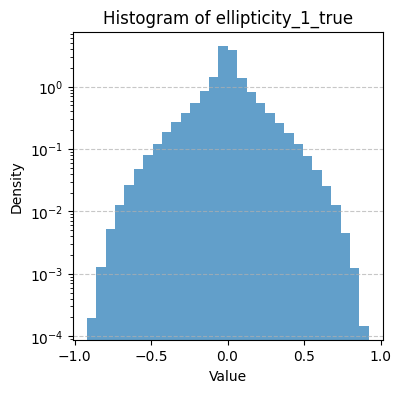

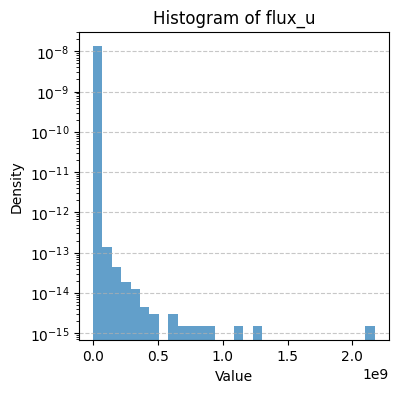

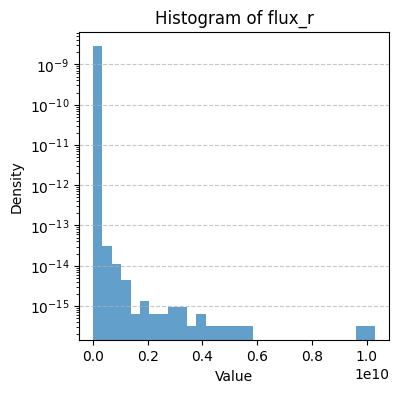

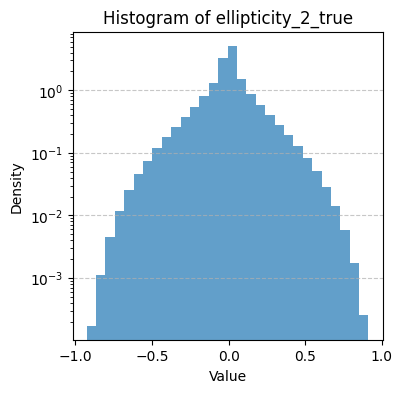

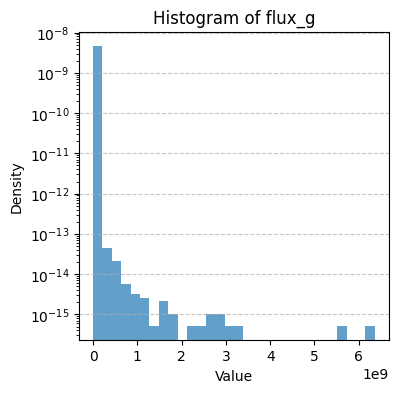

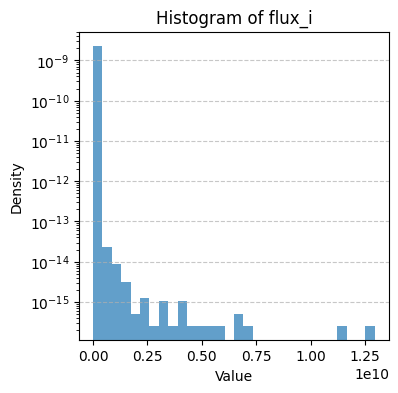

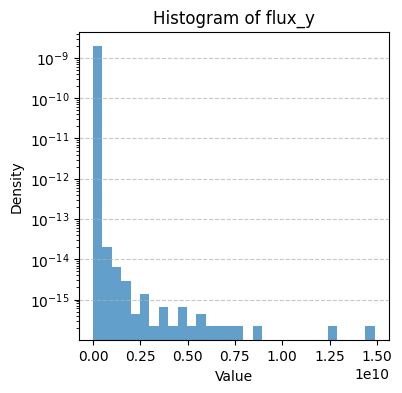

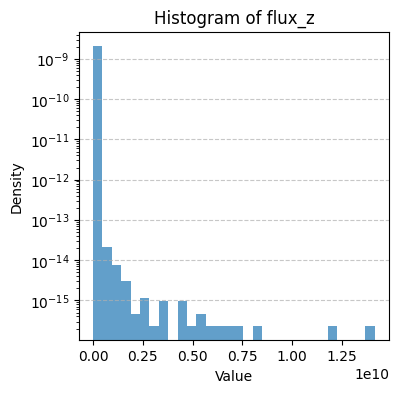

In [6]:
for v in v_to_pred:
    cur_v = cat[v]
    # Create the histogram
    plt.figure(figsize=(4, 4))
    plt.hist(cur_v, bins=30, alpha=0.7, density=True, log=True)
    plt.title(f"Histogram of {v}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

In [7]:
flux_list = []
ellipticity_list = []
for v in v_to_pred:
    cur_v = torch.from_numpy(cat[v].values)
    cur_v = cur_v[~torch.isnan(cur_v)]
    if "flux" in v:
        flux_list.append(cur_v)
    elif "ellipticity" in v:
        ellipticity_list.append(cur_v)

In [8]:
flux_tensor = torch.cat(flux_list)
ellipticity_tensor = torch.cat(ellipticity_list)

In [9]:
min_flux = flux_tensor.min()
log_flux = torch.log(flux_tensor - min_flux + 1)
min_log_flux = log_flux.min()
max_log_flux = log_flux.max()
normalized_flux = (log_flux - min_log_flux) / (max_log_flux - min_log_flux) * 2 - 1
print(min_flux)
print(min_log_flux)
print(max_log_flux)
print(normalized_flux.min(), normalized_flux.max())

tensor(0.5724)
tensor(0.)
tensor(23.4244)
tensor(-1.) tensor(1.)


In [10]:
min_ellipticity = ellipticity_tensor.min()
max_ellipticity = ellipticity_tensor.max()
normalized_ellipticity = (ellipticity_tensor - min_ellipticity) / (max_ellipticity - min_ellipticity) * 2 - 1
print(min_ellipticity)
print(max_ellipticity)
print(normalized_ellipticity.min(), normalized_ellipticity.max())

tensor(-0.9260, dtype=torch.float64)
tensor(0.9227, dtype=torch.float64)
tensor(-1., dtype=torch.float64) tensor(1., dtype=torch.float64)


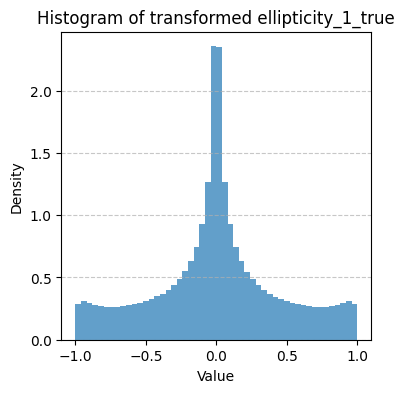

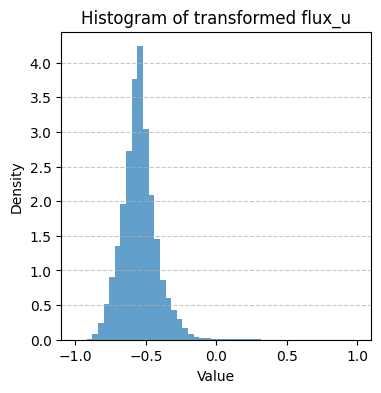

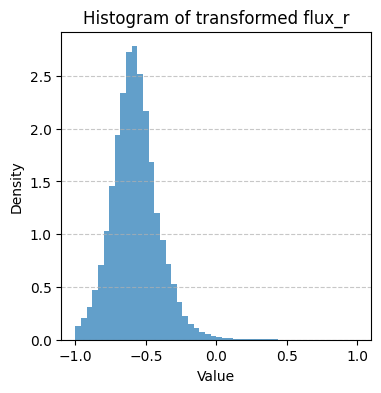

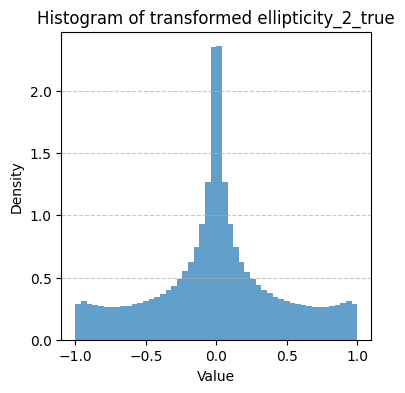

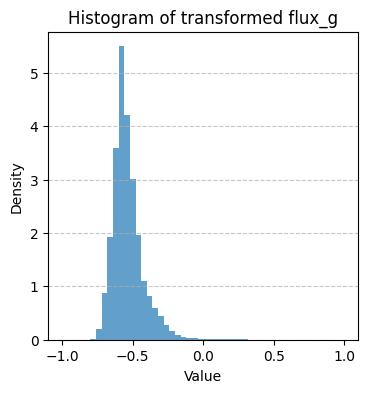

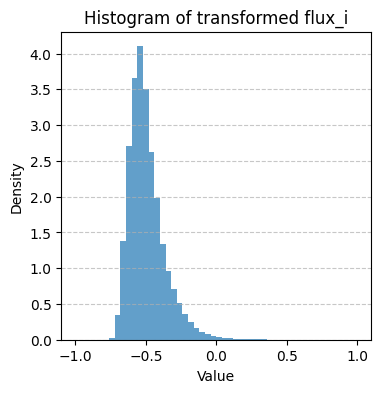

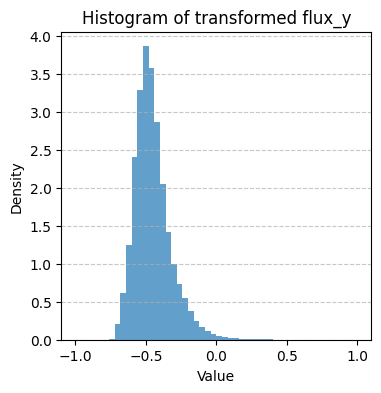

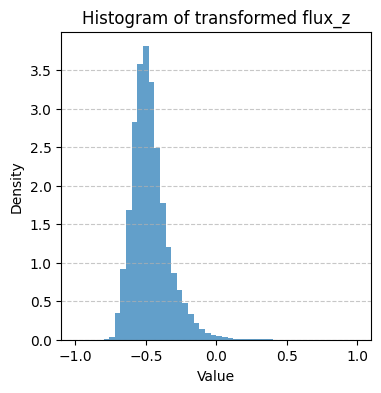

In [16]:
for v in v_to_pred:
    cur_v = torch.from_numpy(cat[v].values)
    cur_v = cur_v[~torch.isnan(cur_v)]

    if "flux" in v:
        normalized_v = torch.log(cur_v - cur_v.min() + 1)
        normalized_v = (normalized_v - normalized_v.min()) / (normalized_v.max() - normalized_v.min()) * 2 - 1
    elif "ellipticity" in v:
        normalized_v = torch.exp(8 * cur_v) / (1 + torch.exp(8 * cur_v))
        normalized_v = (normalized_v - normalized_v.min()) / (normalized_v.max() - normalized_v.min()) * 2 - 1
    else:
        normalized_v = (cur_v - cur_v.min()) / (cur_v.max() - cur_v.min()) * 2 - 1

    plt.figure(figsize=(4, 4))
    plt.hist(normalized_v, bins=50, alpha=0.7, density=True)
    plt.title(f"Histogram of transformed {v}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
